# DSP ODEV 6
# Adı: Ahmet Ali Tilkicioğlu
# No: 210102002163
## Örnek kodlar aşağıda verilmiştir.
### Örnek 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sgnl
from scipy.fftpack import fft, ifft
from scipy.io import loadmat
import SystemFunction
from scipy.io import loadmat
%matplotlib inline

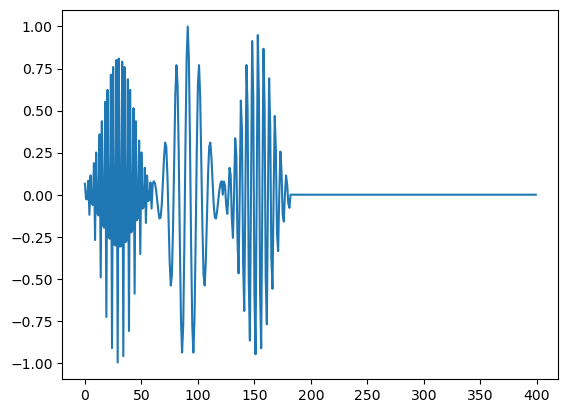

In [2]:
N=400
M=60
n=np.arange(0,M+1,1)
wn=0.54-0.46*np.cos(2*np.pi*n/M)
x1=wn*np.cos(0.2*np.pi*n)
x2=wn*np.cos(0.4*np.pi*n-np.pi/2)
x3=wn*np.cos(0.8*np.pi*n-np.pi/5)
xn=np.concatenate((x3, x1, x2, np.zeros(N-3*len(n))), axis=None)
plt.figure()
plt.plot(xn)
plt.show()

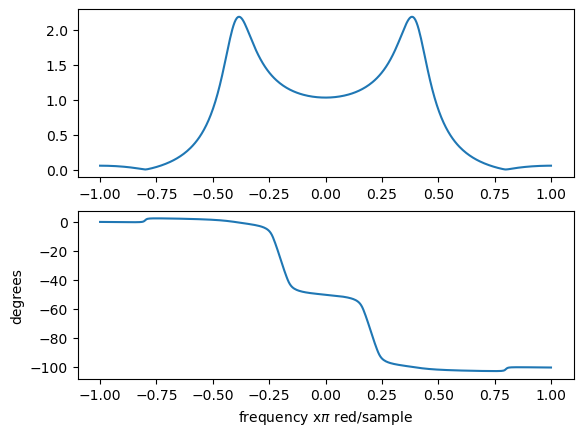

In [3]:
w=np.linspace(-np.pi,np.pi,N)
Xw=fft(xn)
Xw_shifted = np.fft.fftshift(Xw)
Hw,polezz,zerozz,K=SystemFunction.SystemFunction(w)
Hw_mag =abs(Hw)
Hw_phs = np.unwrap(np.angle(Hw))
fig,(ax1,ax2)=plt.subplots(2)
ax1.plot(w/np.pi,Hw_mag)
ax2.plot(w/np.pi,Hw_phs)
plt.ylabel('degrees')
plt.xlabel('frequency x$\pi$ red/sample')
plt.show()

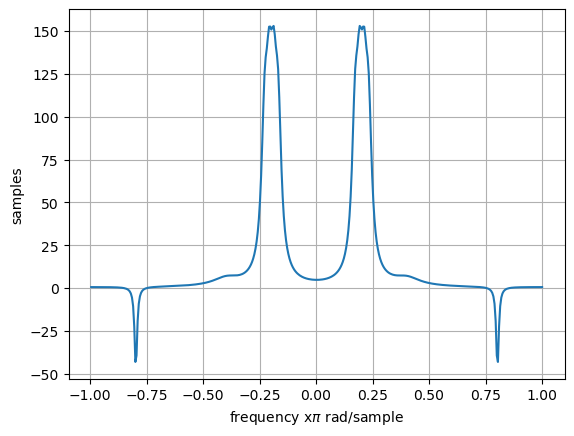

In [4]:
tau_w = -np.diff(Hw_phs)*(N/(2*np.pi))
plt.figure()
plt.plot(w[1::]/np.pi,tau_w)
plt.ylabel('samples'), plt.xlabel('frequency x$\pi$ rad/sample')
plt.grid()
plt.show()

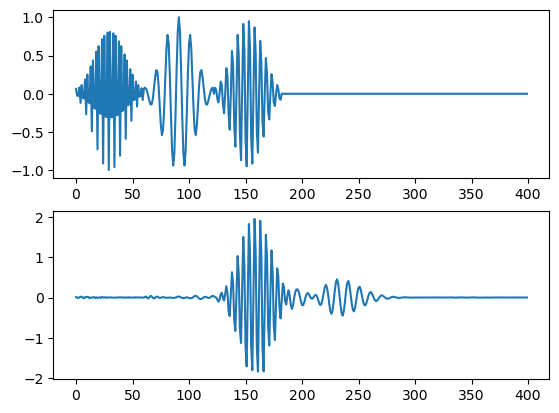

In [5]:
Yw_shifted= Hw * Xw_shifted
Yw = np.fft.ifftshift(Yw_shifted)
yn = np.real(ifft(Yw))
fig, (ax1,ax2) = plt.subplots(2)
ax1.plot(xn)
ax2.plot(yn)

### Örnek 3

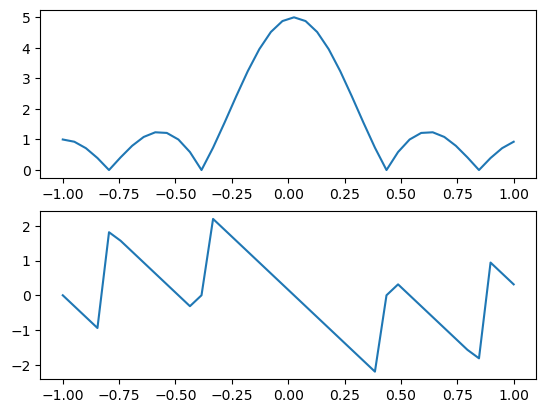

In [6]:
N=40
hn=np.ones(5)
Hw=np.fft.fftshift(fft(hn,N))
w=np.linspace(-np.pi,np.pi,N)
Hw_mag = abs(Hw)
Hw_phs=np.unwrap(np.angle(Hw))
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(w/np.pi,Hw_mag)
ax2.plot(w/np.pi,Hw_phs)

Text(0, 0.5, 'samples')

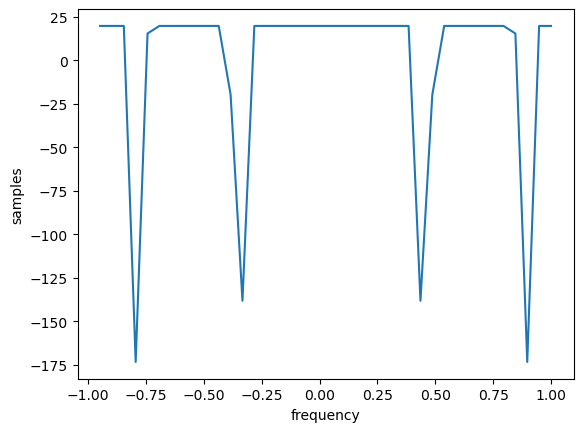

In [7]:
tau_w =-np.diff(Hw_phs)*(N/2*np.pi)
plt.figure()
plt.plot(w[1::]/np.pi,tau_w)
plt.xlabel('frequency')
plt.ylabel('samples')

(<StemContainer object of 3 artists>, None)

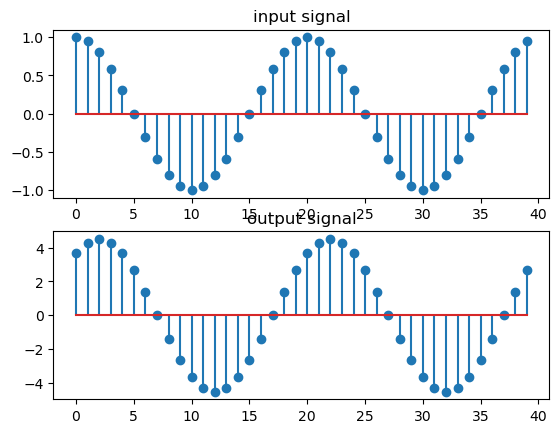

In [8]:
n=np.arange(0,N,1)
w0=0.1*np.pi
xn = np.cos(w0*n)
Xw=np.fft.fftshift(fft(xn,N))
Yw_shifted = Hw * Xw
Yw = np.fft.ifftshift(Yw_shifted)
yn=np.real(ifft(Yw))
fig, (ax1,ax2) =plt.subplots(2)
ax1.stem(n,xn) , ax1.title.set_text('input signal')
ax2.stem(n,yn) , ax2.title.set_text('output signal')

### Örnek 4

Text(0.5, 0, 'frequency x$\\pi$')

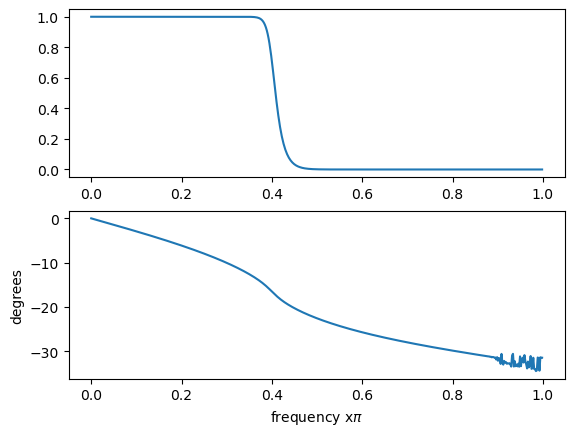

In [9]:
filter_data = loadmat('Butterworth.mat')
Coeffs = filter_data['ba'].astype(float)
b = Coeffs[:,0]
a = Coeffs[:,1]
w, Hw=sgnl.freqz(b,a)
Hw_mag = abs(Hw)
Hw_phs = np.unwrap(np.angle(Hw))
fig, (ax1,ax2)=plt.subplots(2)
ax1.plot(w/np.pi, Hw_mag)
ax2.plot(w/np.pi, Hw_phs) 
plt.ylabel('degrees')
plt.xlabel('frequency x$\pi$')

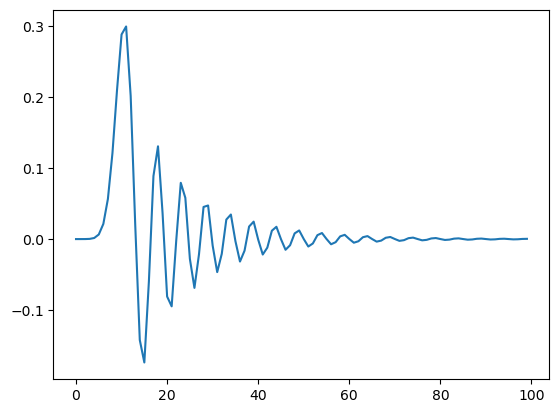

In [10]:
n, hn=sgnl.dimpulse ((b,a,1),n=100)
plt.figure()
plt.plot(n,np.squeeze((hn)))

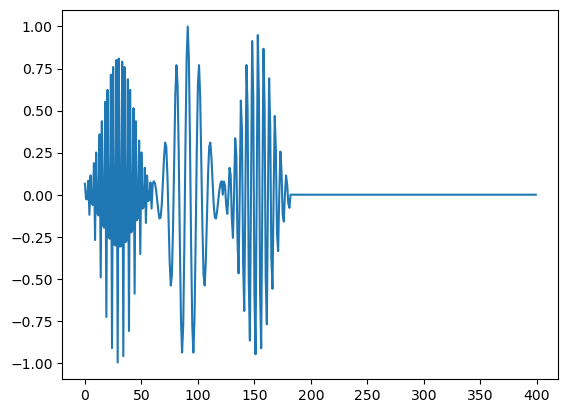

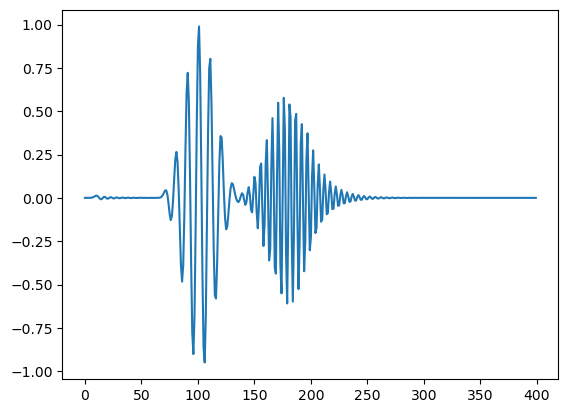

In [11]:
N=400
M=60
n=np.arange(0,M+1,1)
wn=0.54-0.46*np.cos(2*np.pi*n/M)
x1=wn*np.cos(0.2*np.pi*n)
x2=wn*np.cos(0.4*np.pi*n-np.pi/2)
x3=wn*np.cos(0.8*np.pi*n-np.pi/5)
xn=np.concatenate((x3, x1, x2, np.zeros(N-3*len(n))), axis=None)
plt.figure()
plt.plot(xn)
yn=sgnl.lfilter(b,a,xn)
plt.figure()
plt.plot(yn)

### SORU 1

### Kısım 1

Text(0.5, 0, 'frequency x$\\pi$')

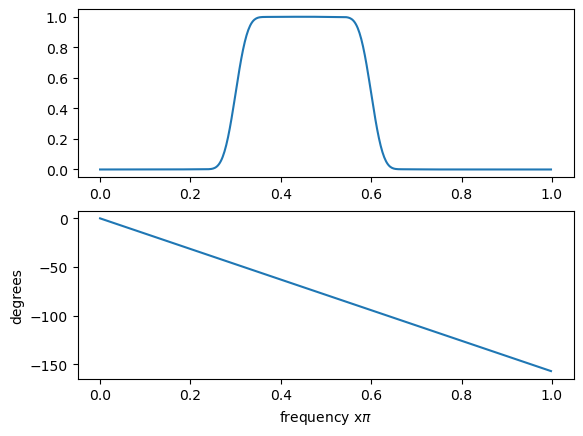

In [12]:
filter_data = loadmat('Bandpass_Parzen8.mat')
Coeffs = filter_data['ba'].astype(float)
b = Coeffs[:,0]
#a = Coeffs[:,1]
w, Hw=sgnl.freqz(b,1)
Hw_mag = abs(Hw)
Hw_phs = np.unwrap(np.angle(Hw))
fig, (ax1,ax2)=plt.subplots(2)
ax1.plot(w/np.pi, Hw_mag)
ax2.plot(w/np.pi, Hw_phs) 
plt.ylabel('degrees')
plt.xlabel('frequency x$\pi$')

## -6db zayıflama

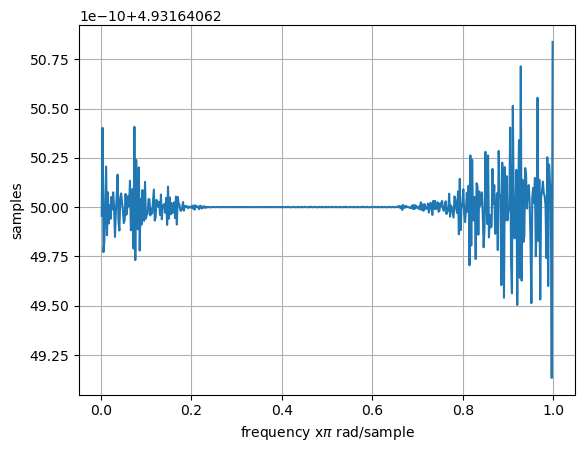

In [13]:
tau_w = -np.diff(Hw_phs)*(101/(2*np.pi))
plt.figure()
plt.plot(w[1::]/np.pi,tau_w)
plt.ylabel('samples'), plt.xlabel('frequency x$\pi$ rad/sample')
plt.grid()
plt.show()

Text(0.5, 0, 'frequency x$\\pi$')

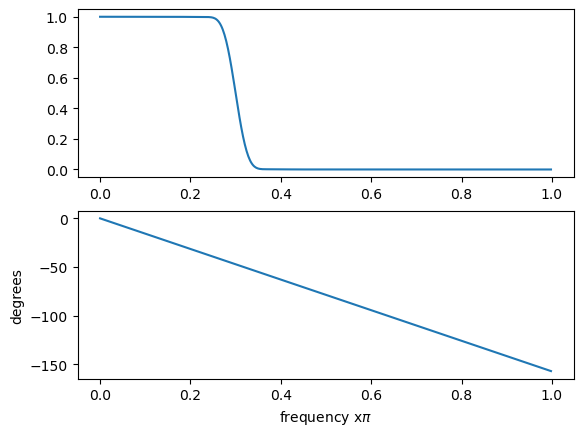

In [14]:
filter_data = loadmat('Lowpass_Parzen3.mat')
Coeffs = filter_data['ba'].astype(float)
b = Coeffs[:,0]
#a = Coeffs[:,1]
w, Hw=sgnl.freqz(b,1)
Hw_mag = abs(Hw)
Hw_phs = np.unwrap(np.angle(Hw))
fig, (ax1,ax2)=plt.subplots(2)
ax1.plot(w/np.pi, Hw_mag)
ax2.plot(w/np.pi, Hw_phs) 
plt.ylabel('degrees')
plt.xlabel('frequency x$\pi$')

## -6db zayıflama

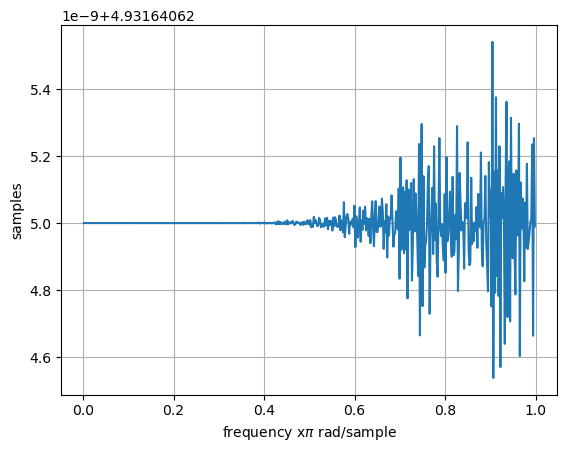

In [15]:
tau_w = -np.diff(Hw_phs)*(101/(2*np.pi))
plt.figure()
plt.plot(w[1::]/np.pi,tau_w)
plt.ylabel('samples'), plt.xlabel('frequency x$\pi$ rad/sample')
plt.grid()
plt.show()

### FIR filtrelerin lineer fazda olduğu gözlemlenmiştir.

### Kısım 2

Text(0.5, 0, 'frequency x$\\pi$')

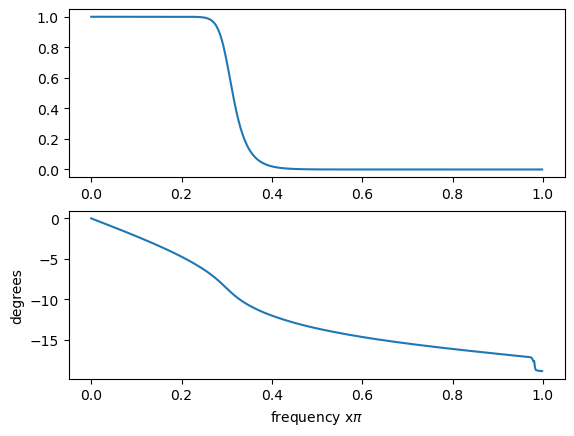

In [16]:
filter_data = loadmat('Lowpass_Butterworth5.mat')
Coeffs = filter_data['ba'].astype(float)
b = Coeffs[:,0]
a = Coeffs[:,1]
w, Hw=sgnl.freqz(b,a)
Hw_mag = abs(Hw)
Hw_phs = np.unwrap(np.angle(Hw))
fig, (ax1,ax2)=plt.subplots(2)
ax1.plot(w/np.pi, Hw_mag)
ax2.plot(w/np.pi, Hw_phs) 
plt.ylabel('degrees')
plt.xlabel('frequency x$\pi$')

## -3db zayıflama

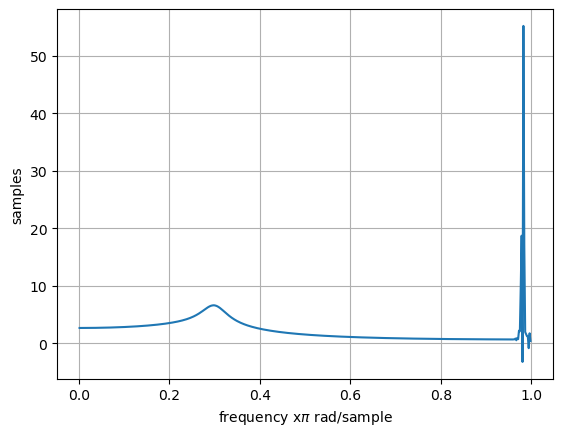

In [17]:
tau_w = -np.diff(Hw_phs)*(N/(2*np.pi))
plt.figure()
plt.plot(w[1::]/np.pi,tau_w)
plt.ylabel('samples'), plt.xlabel('frequency x$\pi$ rad/sample')
plt.grid()
plt.show()

Text(0.5, 0, 'frequency x$\\pi$')

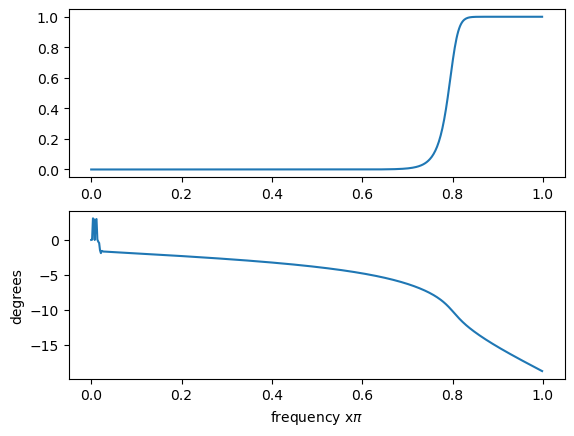

In [18]:
filter_data = loadmat('Highpass_Butterworth4.mat')
Coeffs = filter_data['ba'].astype(float)
b = Coeffs[:,0]
a = Coeffs[:,1]
w, Hw=sgnl.freqz(b,a)
Hw_mag = abs(Hw)
Hw_phs = np.unwrap(np.angle(Hw))
fig, (ax1,ax2)=plt.subplots(2)
ax1.plot(w/np.pi, Hw_mag)
ax2.plot(w/np.pi, Hw_phs) 
plt.ylabel('degrees')
plt.xlabel('frequency x$\pi$')



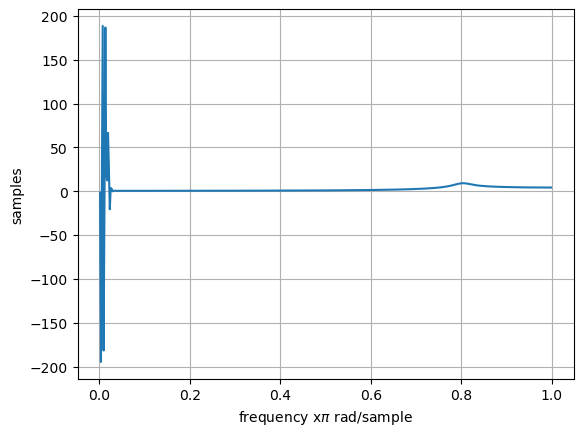

In [19]:
tau_w = -np.diff(Hw_phs)*(N/(2*np.pi))
plt.figure()
plt.plot(w[1::]/np.pi,tau_w)
plt.ylabel('samples'), plt.xlabel('frequency x$\pi$ rad/sample')
plt.grid()
plt.show()

### IIR Filtreler lineer fazda değildir.

### FIR filtrelerde faz lineer ve sonlu sayıda 0'dan farklı değere sahiptir. Grup geçikmesi sabittir.
### IIR filtreler sonsuz sayıda değere sahip ve fazda linear değildir. Grup gecikmesi sabit değildir.